a notebook to calculate value retention and depreciation. What statistical factors contribute to depreciation?

In [1]:
import pandas as pd

In [2]:
df = pd.read_pickle('/Users/pkc/PycharmProjects/pythonProject/Automotive/pickles/df_analyzed.pickle')

how to filter data down to all models with all ten years

In [19]:
year_list=df.year.value_counts().index.tolist()

In [20]:
year_list.sort()

In [21]:
year_list

[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

don't think this approach will work. need to just filter for where the len of hte set of years for each model is equal to ten

In [6]:
df_models_count= df.model.value_counts().to_frame()

In [12]:
df_models_count.reset_index()

,model,count
0,Golf,1492
1,Corsa,1491
2,Fiesta,1289
3,Astra,1191
4,Focus,985
...,...,...
837,Huracan,1
838,MUSSO,1
839,Cross Golf,1
840,SL 350,1


In [23]:
df_top20=df_models_count.head(20).copy()

In [25]:
top20list=df_top20.index.tolist()

In [31]:
df_top20=df[df.model.isin(top20list)].copy()

In [33]:
df_top20.groupby('model').year.value_counts()

model  year
500    2021    234
       2020     86
       2019     63
       2014     51
       2015     43
              ... 
up!    2013     73
       2019     45
       2021     22
       2020     21
       2011      7
Name: count, Length: 220, dtype: int64

In [37]:
df_model_year_price=df_top20.groupby(['model','year']).price.mean().copy().to_frame()

In [42]:
df_myp=df_model_year_price.reset_index()

In [43]:
df_myp.columns

Index(['model', 'year', 'price'], dtype='object')

In [44]:
df_myp.model.value_counts()

model
500        11
A3         11
i10        11
forTwo     11
Twingo     11
Tiguan     11
Polo       11
Octavia    11
Leon       11
Ibiza      11
Golf       11
Focus      11
Fiesta     11
Fabia      11
Corsa      11
Clio       11
Aygo       11
Astra      11
A4         11
up!        11
Name: count, dtype: int64

In [46]:
df_myp['yrsOld']= abs(df_myp.year-2021)

In [47]:
df_myp

,model,year,price,yrsOld
0,500,2011,5711.611111,10
1,500,2012,6358.620690,9
2,500,2013,6608.459459,8
3,500,2014,7309.235294,7
4,500,2015,7839.000000,6
...,...,...,...,...
215,up!,2017,7903.896907,4
216,up!,2018,8476.690141,3
217,up!,2019,10698.022222,2
218,up!,2020,12025.761905,1


In [48]:
df_myp.price= round(df_myp.price)

In [49]:
df_myp= df_myp.rename(columns={'price':'avg_price'})

In [57]:
df_myp=df_myp.sort_values(['model','yrsOld'])

In [59]:
df_myp.reset_index(drop=False)

,index,model,year,avg_price,yrsOld
0,10,500,2021,14157.0,0
1,9,500,2020,13619.0,1
2,8,500,2019,11490.0,2
3,7,500,2018,9861.0,3
4,6,500,2017,9149.0,4
...,...,...,...,...,...
215,213,up!,2015,7264.0,6
216,212,up!,2014,6267.0,7
217,211,up!,2013,6033.0,8
218,210,up!,2012,5187.0,9


In [61]:
df_myp.reset_index(drop=True)

,model,year,avg_price,yrsOld
0,500,2021,14157.0,0
1,500,2020,13619.0,1
2,500,2019,11490.0,2
3,500,2018,9861.0,3
4,500,2017,9149.0,4
...,...,...,...,...
215,up!,2015,7264.0,6
216,up!,2014,6267.0,7
217,up!,2013,6033.0,8
218,up!,2012,5187.0,9


<Axes: xlabel='yrsOld'>

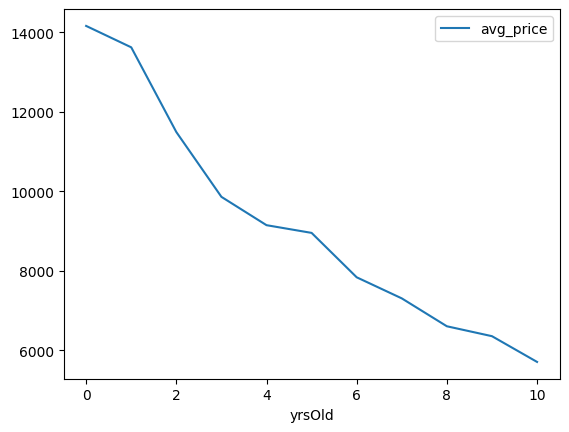

In [63]:
df_myp[df_myp.model=='500'].plot(x='yrsOld',y='avg_price')

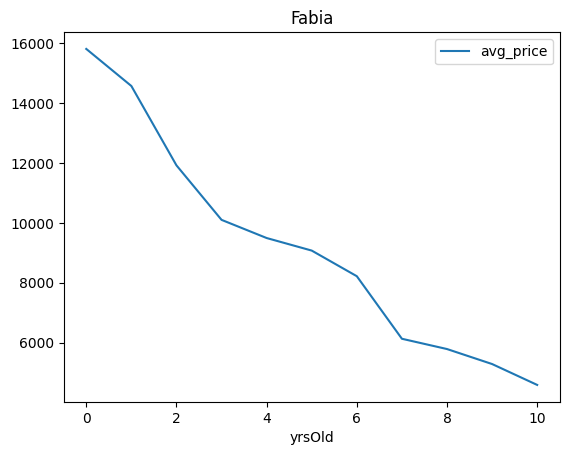

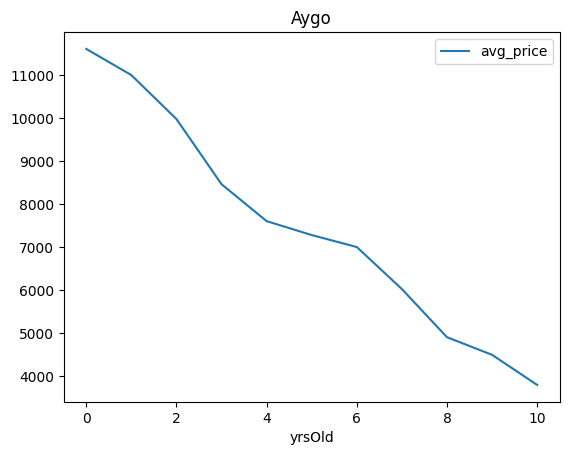

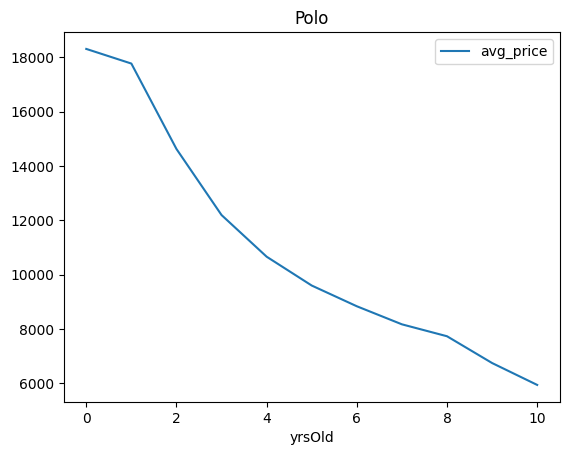

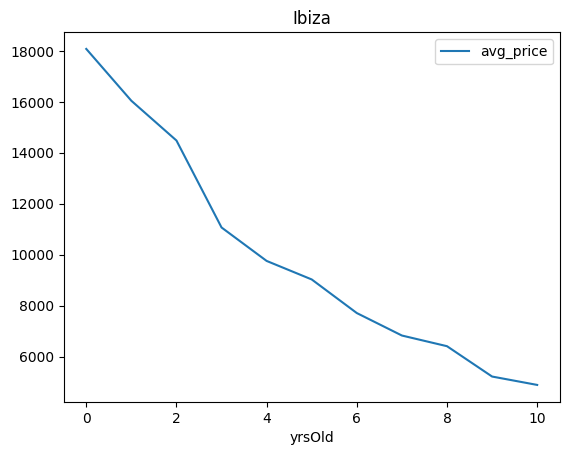

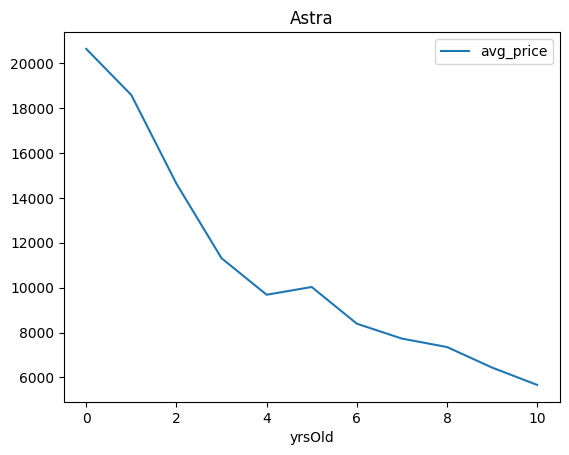

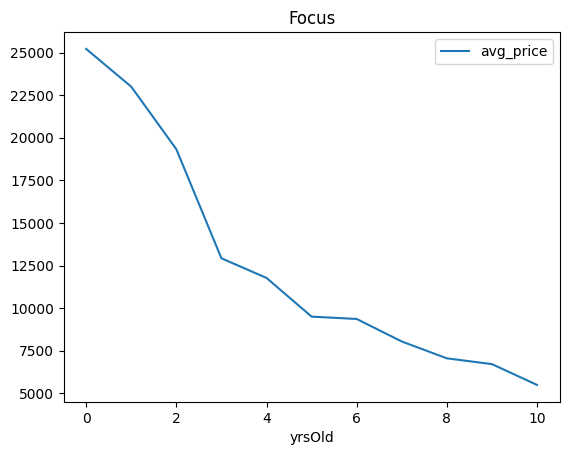

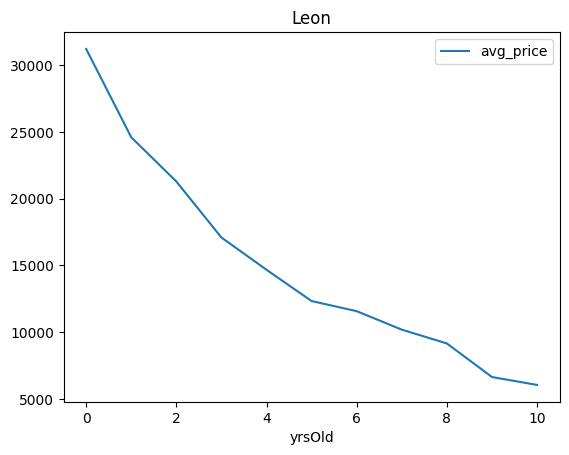

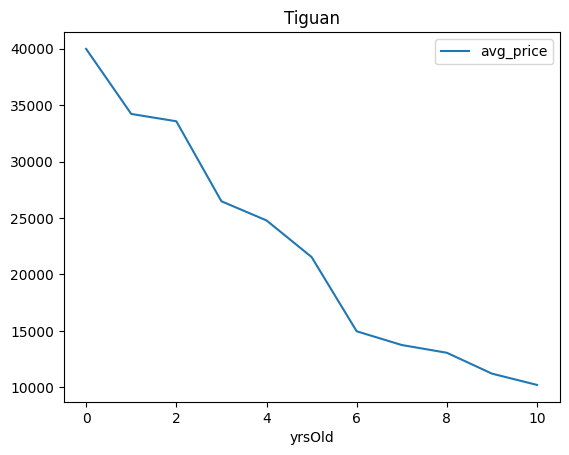

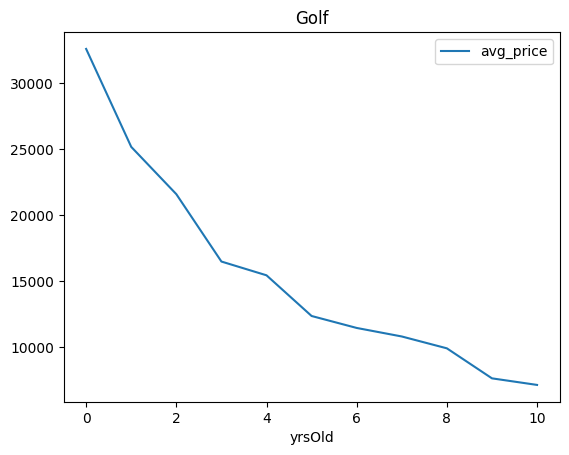

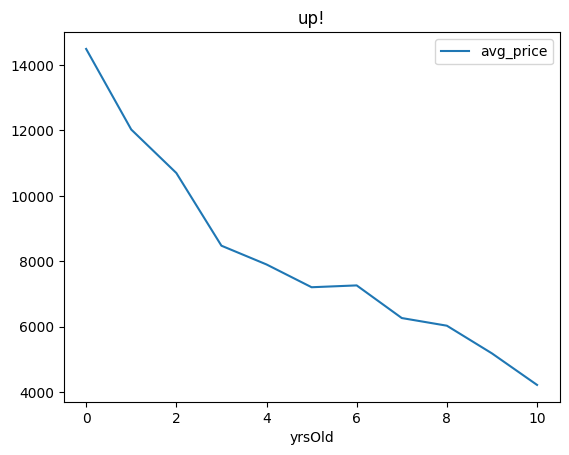

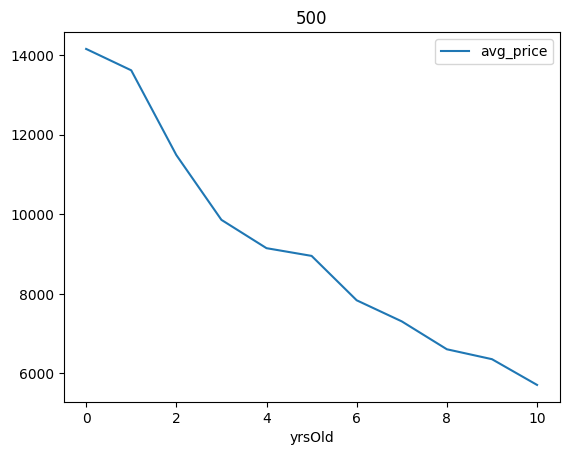

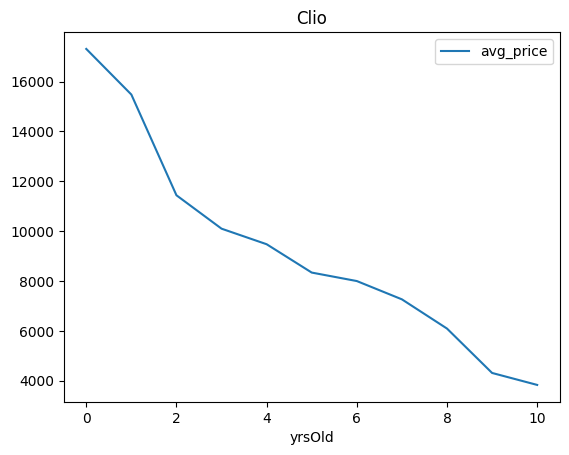

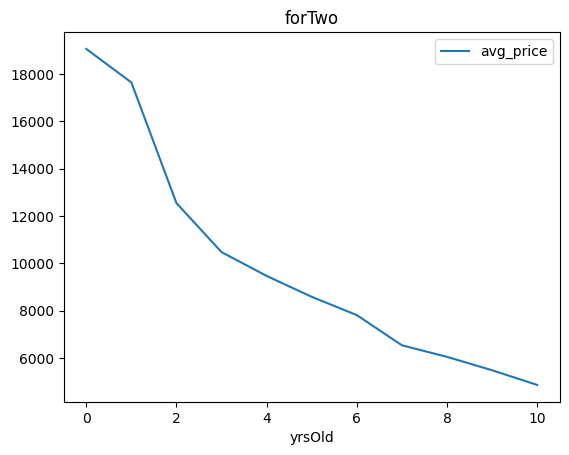

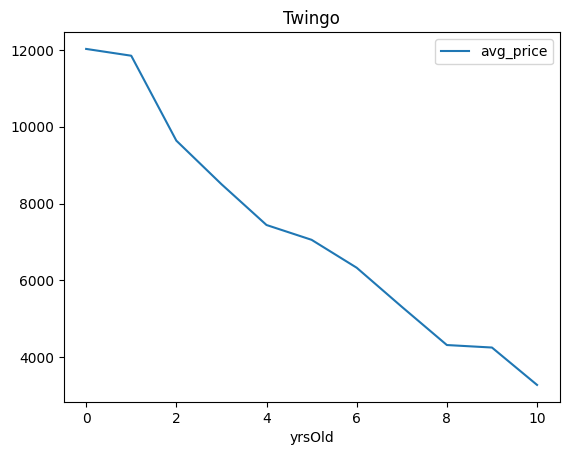

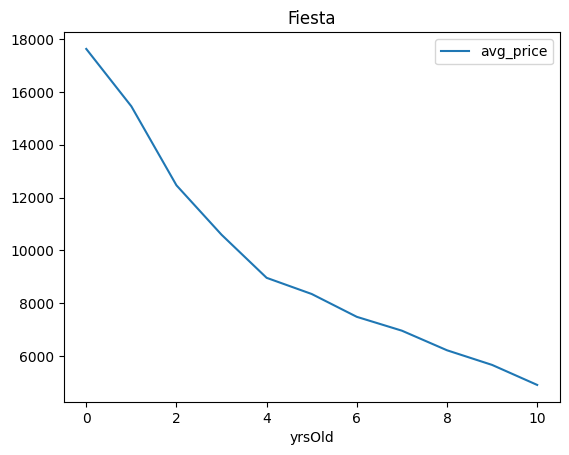

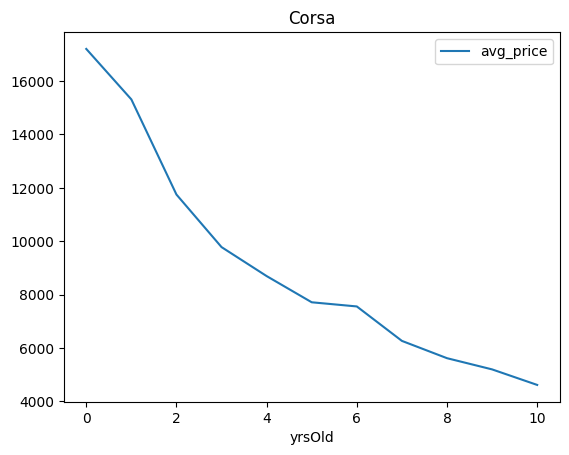

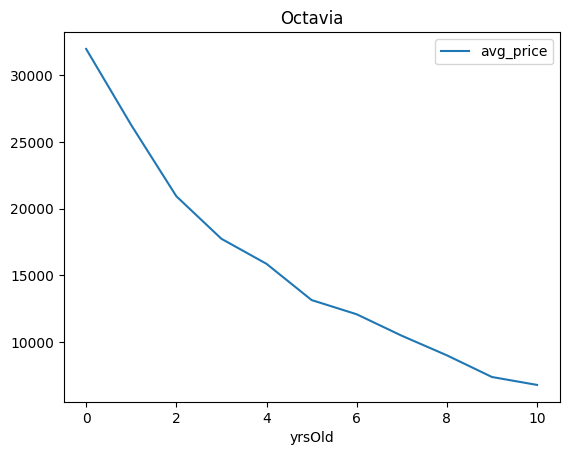

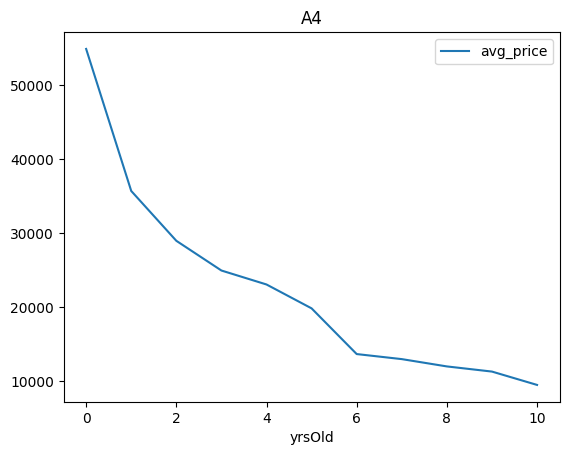

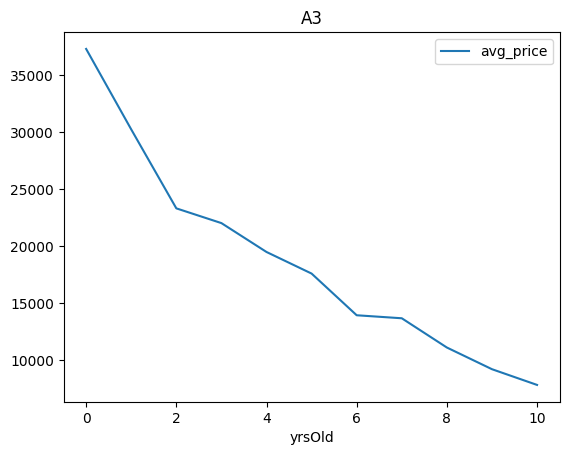

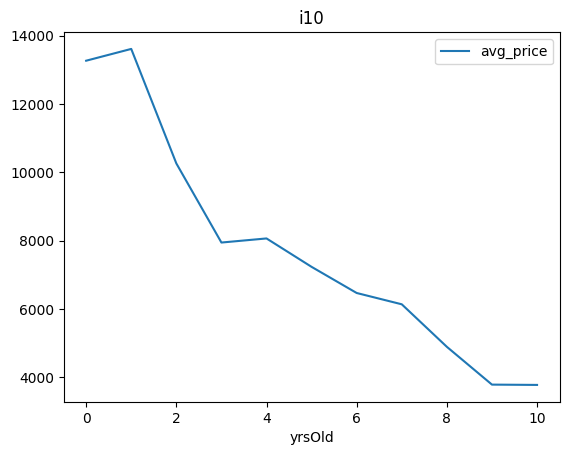

In [69]:
for i in set(df_myp.model):
    df_myp[df_myp.model==i].plot(x='yrsOld',y='avg_price',title=i)

In [70]:
df_myp

,model,year,avg_price,yrsOld
10,500,2021,14157.0,0
9,500,2020,13619.0,1
8,500,2019,11490.0,2
7,500,2018,9861.0,3
6,500,2017,9149.0,4
...,...,...,...,...
213,up!,2015,7264.0,6
212,up!,2014,6267.0,7
211,up!,2013,6033.0,8
210,up!,2012,5187.0,9


In [71]:
df_myp.to_excel('top20_price_decline.xlsx')

In [72]:
df_myp.to_pickle('top20model_price.pickle')

why is there a significant jump up from 2 yrs old to 3?

shows you when you max write off